# Neuro-Meta-Analyses

Goal of this extraction was to annotate inclusion/exclusion reasons across a large set of neuroimaging meta-analysis, with the goal of understanding common sources of inclusion/exclusion across studies, to develop a common set of reasons that can be extracted from neuroimaging papers, to aid in automatically including/excluding papers

In [2]:
import pandas as pd
import json
from IPython.display import display, HTML
import textwrap

/tmp/ipykernel_366089/1873458976.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [16]:
# Load json lines
mini_df = pd.read_json('../../outputs/neuro_meta_analyses/full_neuro-meta-analyses_gpt-4o-mini-2024-07-18.json')
# lower case the keys
mini_df = mini_df.rename(columns=lambda x: x.lower() if isinstance(x, str) else x)
gpt5 = json.load(open('../../outputs/neuro_meta_analyses/full_neuro-meta-analyses_gpt-5-mini.json', 'r'))
gpt5 = [{k.lower(): v for k, v in d.items()} for d in gpt5]
gpt5_df = pd.DataFrame(gpt5)

In [17]:
# Save a subset of the data for subsequent summarization using gpt-5
gpt5_df[['cognitivedomain', 'inclusioncriteria', 'exclusioncriteria', 'doi']].to_json(
    '../../outputs/neuro_meta_analyses/gpt5_cognitive_domain_inclusion_exclusion.json', orient='records', lines=True)

Subjective evaluation of the extractions show similar quality between the two, with a slight edge in detail to GPT5

In [18]:
def pretty_print_side_by_side(row1, row2, columns=None, width=50):
    """Display two rows from different DataFrames side-by-side for easy comparison. """
    if columns is None:
        columns = row1.index.tolist()
    
    # HTML table for side-by-side display
    html = "<table style='border-collapse: collapse; width: 100%; table-layout: fixed;'>"
    html += "<tr><th style='width:20%; text-align:left;'>FIELD</th>"
    html += "<th style='width:40%; text-align:left;'>mini_df</th>"
    html += "<th style='width:40%; text-align:left;'>gpt5_df</th></tr>"
    
    for col in columns:
        val1 = row1[col]
        val2 = row2[col]
        
        # Clean / format
        def format_val(v):
            if isinstance(v, list):
                v = ', '.join(map(str, v))
            elif pd.isna(v):
                v = 'N/A'
            return "<br>".join(textwrap.wrap(str(v), width=width))
        
        html += f"<tr>"
        html += f"<td style='font-weight:bold; vertical-align:top;'>{col.upper()}</td>"
        html += f"<td style='vertical-align:top;'>{format_val(val1)}</td>"
        html += f"<td style='vertical-align:top;'>{format_val(val2)}</td>"
        html += f"</tr>"
    
    html += "</table>"
    display(HTML(html))


# Example usage:
columns = [
    'modality', 'cognitivedomain', 'populationdescription', 'agerange', 'clinicalstatus',
    'searchquery', 'inclusioncriteria', 'exclusioncriteria', 'totalidentifiedstudies',
    'finalnumberofstudies', 'coordinatespace', 'metaanalysismethod', 'metaanalysissoftware',
    'analysesconducted',
]

In [19]:
mini_df

,modality,cognitivedomain,populationdescription,agerange,clinicalstatus,searchquery,datesofsearch,searchdatabase,additionalidentificationmethods,inclusioncriteria,exclusioncriteria,totalidentifiedstudies,finalnumberofstudies,coordinatespace,metaanalysismethod,metaanalysissoftware,analysesconducted,pmcid,doi,pmid
0,[fMRI-BOLD],[functional connectivity],migraine patients and healthy subjects,None,"[Clinical, Healthy]",(migraine) AND (resting state OR rest) AND (DM...,up to July 2022,"PubMed, Web of Science, and Embase",manual search from related reviews and references,(i) original rs-fMRI study written in English;...,(i) it is a book chapter or review article; (i...,9.0,9.0,MNI,Anisotropic Effect Size version of Signed Diff...,AES-SDM software package version 5.15 for Windows,"[subgroup analyses, sensitivity analysis, meta...",10014826.0,10.3389/fnins.2023.1136790,36937687.0
1,[fMRI-BOLD],"[Anxiety, fear conditioning]",healthy volunteers,mean age 32.7 years,[Healthy],vestibular cortex OR vestibular stimulation OR...,"until September 3rd, 2021",PubMed,checked the reference sections of published ar...,studies investigating healthy participants wit...,studies conducted with positron emission tomog...,173.0,10.0,MNI,Seed-based d-Mapping-Permutation of Subject Im...,Sdm-Psi version 6.21,[voxel-wise combined into random-effects meta-...,10025232.0,10.1007/s00415-023-11568-7,36723684.0
2,[fMRI-BOLD],[emotion processing],youths with conduct problems,10-21,[Clinical],"conduct disorder, oppositional defiant disorde...",prior to February 2021,PubMed,The references of included articles were again...,(1) reported x/y/z coordinates using Talairach...,studies that summarized the literature and did...,837.0,23.0,MNI,seed-based d Mapping with Permutation of Subje...,SDM-PSI version 6.21,"[whole-brain analyses, ROI analyses, meta-regr...",10063659.0,10.1038/s41398-023-02363-z,36997510.0
3,"[StructuralMRI, fMRI]","[executive control, cognitive function, reward...",IGD patients and healthy controls,None,"[Clinical, Healthy]",(voxel-based morphometry or VBM or gray matter...,"January 1, 2010 to October 31, 2021","PubMed, ScienceDirect, Web of Science, Scopus",None,(1) they used specific tasks during the MRI sc...,(1) they only reported region of interest find...,1002.0,45.0,MNI,anisotropic seed-based d mapping (AES-SDM),AES-SDM,"[meta-regression analysis, jack-knife sensitiv...",10074425.0,10.3389/fpsyt.2022.1029344,37033880.0
4,[rs-fMRI],[cognitive dysfunction],Patients with sleep deprivation comorbid with ...,None,[Clinical],(randomized controlled trial or randomized or ...,"from inception to November 1, 2022","PubMed, EMBASE, EBSCOhost-Medline, Web of Scie...",None,Randomized controlled trials reporting that st...,Articles of the following research types will ...,NaN,NaN,None,None,Review Manager 5.4,[Quality and risk assessment of included studi...,10082247.0,10.1097/MD.0000000000033490,37026925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,"[fMRI-BOLD, StructuralMRI, DiffusionMRI, PET F...",None,None,None,None,None,None,None,None,None,None,NaN,NaN,None,None,None,None,NaN,10.1146/annurev-neuro-062012-170320,25032500.0
895,[fMRI-BOLD],[working memory],Gender differences in psychological processes,None,None,BrainMap Gender differences Sex differences Wo...,None,BrainMap,None,None,None,NaN,NaN,None,activation likelihood estimation,None,None,NaN,10.1016/j.biopsycho.2014.06.008,25042764.0
896,[fMRI-BOLD],"[emotional face recognition, cognitive tasks]",children and adolescents diagnosed with bipola...,<18 years old,[Clinical],"original, task-related coordinate-based fMRI a...","July 17, 2013",PubMed and PsycINFO,None,"21 pediatric studies, 73 adult studies, and 2 ...",None,96.0,96.0,None,activation likelihood estimation (ALE),GingerALE,[direct comparisons of pediatric and adult fMR...,NaN,10.1001/jamapsychiatry.2014.660,25100166.0
897,[fMRI-BOLD],[social pain],"940 subjects, the majority of which used the c..

In [20]:
# For every row, print DOI and then print side-by-side comparison
for idx in (0, ):  # Adjust indices as needed
    print(f"DOI: {mini_df.iloc[idx]['doi']}")
    pretty_print_side_by_side(mini_df.iloc[idx], gpt5_df.iloc[idx], columns=columns)
    print("\n" + "="*80 + "\n")  # Separator between comparisons

DOI: 10.3389/fnins.2023.1136790


FIELD,mini_df,gpt5_df
MODALITY,fMRI-BOLD,fMRI-BOLD
COGNITIVEDOMAIN,functional connectivity,"default mode network functional connectivity,resting-state functional connectivity in migraine"
POPULATIONDESCRIPTION,migraine patients and healthy subjects,migraine patients and healthy subjects (healthycontrols)
AGERANGE,N/A,N/A
CLINICALSTATUS,"Clinical, Healthy",Mixed
SEARCHQUERY,(migraine) AND (resting state OR rest) AND (DMN ORdefault mode network),(migraine) AND (resting state OR rest) AND (DMN ORdefault mode network)
INCLUSIONCRITERIA,"(i) original rs-fMRI study written in English;(ii) patients included in the study meet thediagnostic criteria for migraine; (iii) used seed-based or ICA methods to conduct rs-fMRI dataanalysis; (iv) direct comparison of rs-FC betweenmigraine patients and healthy subjects; (v) peakcoordinates of between-group effects were reportedin a standard space, such as Talairach or MontrealNeurological Institute (MNI).","(i) original rs-fMRI study written in English;(ii) patients included in the study meet thediagnostic criteria for migraine; (iii) used seed-based or ICA methods to conduct rs-fMRI dataanalysis; (iv) direct comparison of rs-FC betweenmigraine patients and healthy subjects; (v) peakcoordinates of between-group effects were reportedin a standard space, such as Talairach or MontrealNeurological Institute (MNI)."
EXCLUSIONCRITERIA,(i) it is a book chapter or review article; (ii)the coordinates of significant statisticaldifferences in rs-FC between groups could not beretrieved even by contacting the author; (iii) thesample in the study overlapped with anotherpublished study; and (iv) the seeds were notselected in DMN.,(i) book chapter or review article; (ii) thecoordinates of significant statistical differencesin rs-FC between groups could not be retrievedeven by contacting the author; (iii) the sample inthe study overlapped with another published study;(iv) the seeds were not selected in DMN.
TOTALIDENTIFIEDSTUDIES,9.0,N/A
FINALNUMBEROFSTUDIES,9.0,9.0


### Summarization with GPT-5

Using the extraction inclusion/exclusion criteria, I used GPT-5 to summarize the most common inclusion/extraction criteria across the ~890 meta-analysis

In [21]:
print(json.load(open('../../outputs/neuro_meta_analyses/summarized_inclusion_exclusion.json', 'r'))['summary'])

Based on the provided JSON file containing metadata from various neuro-meta-analyses, here is a summary of the most common inclusion and exclusion criteria across the studies:

### Common Inclusion Criteria:
1. **Language and Publication Type**:
   - Studies must be published in English and in peer-reviewed journals.
   - Original research articles are preferred; reviews, meta-analyses, and case studies are generally excluded.

2. **Participant Characteristics**:
   - Studies often include adult participants, with some specifying age ranges (e.g., 18-60 years).
   - Participants may have specific conditions (e.g., diagnosed with mental health disorders like MDD, schizophrenia, or anxiety), while healthy controls are often included for comparison.
   - Some studies allow for inclusion of children or adolescents, particularly in developmental or cognitive studies.

3. **Methodological Criteria**:
   - Use of functional magnetic resonance imaging (fMRI) or positron emission tomography (PE

### Extraction of common inclusion/exclusion criteria 

Later, I used this to create a new extraction schema, and ran it again on the meta-analyses to extract the common inclusion/exclusion criteria.


In [22]:
common_inclusion = pd.read_json('../../outputs/neuro_meta_analyses/full_study-criteria_gpt-5-mini.json')

In [ ]:
inclusion = pd.json_normalize(common_inclusion['inclusion'])
exclusion = pd.json_normalize(common_inclusion['exclusion'])

# Merge
df = pd.concat([inclusion, exclusion], axis=1)
# Add DOI field
df['doi'] = common_inclusion['doi']

In [28]:
df

,published_in_english,peer_reviewed_only,original_research_only,allowed_age_groups,allowed_conditions,imaging_modalities,whole_brain_required,coordinates_required,coordinate_space,diagnostic_framework,...,excluded_comorbid_conditions,excluded_children,excluded_roi_only,excluded_non_fmri_pet,excluded_no_coordinates,excluded_small_sample,excluded_null_findings,excluded_no_multiple_comparison_correction,excluded_irrelevant_tasks,doi
0,True,<NA>,True,<NA>,"[HealthyControls, OtherClinical]",[fMRI],<NA>,True,"[MNI, Talairach]",<NA>,...,<NA>,<NA>,<NA>,True,True,<NA>,<NA>,<NA>,<NA>,10.3389/fnins.2023.1136790
1,True,True,True,[Adults],[HealthyControls],[fMRI],True,False,"[MNI, Talairach]",<NA>,...,True,<NA>,True,True,True,<NA>,<NA>,<NA>,True,10.1007/s00415-023-11568-7
2,True,<NA>,True,"[Children, Adolescents]","[HealthyControls, OtherClinical]",[fMRI],True,True,"[MNI, Talairach]",<NA>,...,<NA>,False,True,True,True,True,False,<NA>,True,10.1038/s41398-023-02363-z
3,True,True,<NA>,<NA>,"[HealthyControls, OtherClinical]","[fMRI, StructuralMRI]",True,True,"[MNI, Talairach]",<NA>,...,True,<NA>,True,<NA>,True,<NA>,<NA>,<NA>,<NA>,10.3389/fpsyt.2022.1029344
4,False,False,True,"[Adults, Children, Adolescents, OlderAdults]",[OtherClinical],[fMRI],True,<NA>,<NA>,<NA>,...,False,False,<NA>,True,<NA>,<NA>,<NA>,<NA>,<NA>,10.1097/MD.0000000000033490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,<NA>,<NA>,<NA>,<NA>,<NA>,[fMRI],<NA>,True,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10.1146/annurev-neuro-062012-170320
895,<NA>,<NA>,<NA>,<NA>,<NA>,[fMRI],<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10.1016/j.biopsycho.2014.06.008
896,<NA>,<NA>,True,"[Adults, Children, Adolescents]","[HealthyControls, OtherClinical]",[fMRI],<NA>,True,<NA>,<NA>,...,<NA>,False,<NA>,True,True,<NA>,<NA>,<NA>,<NA>,10.1001/jamapsychiatry.2014.660
897,<NA>,<NA>,<NA>,"[Adults, Children]",<NA>,[fMRI],<NA>,<NA>,<NA>,<NA>,...,<NA>,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10.1093/scan/nsu110


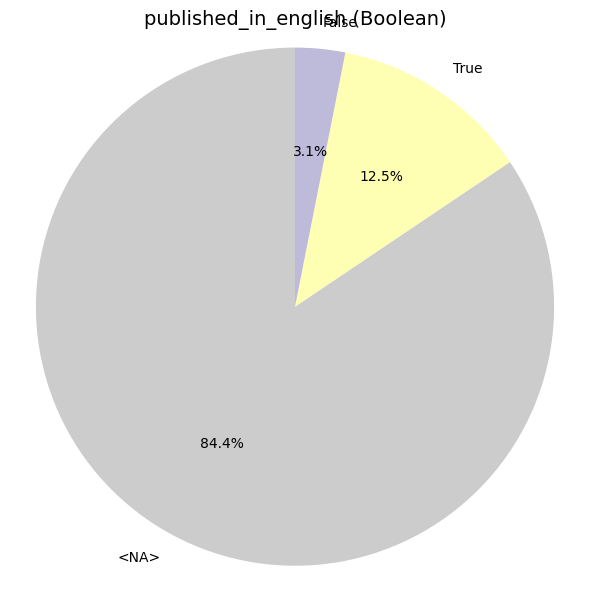

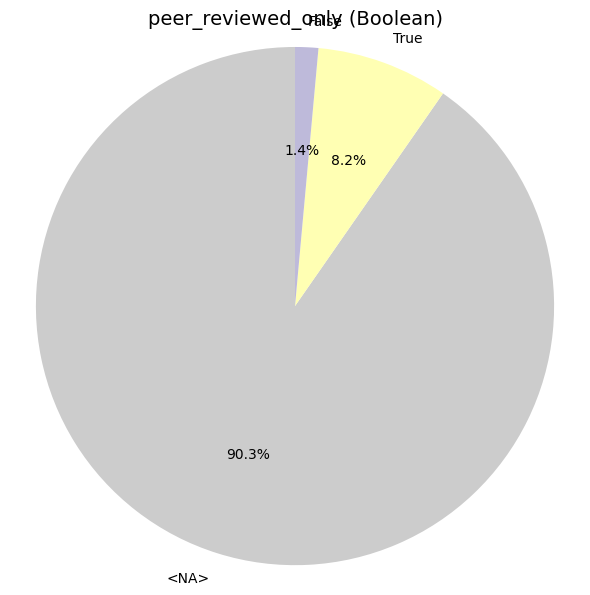

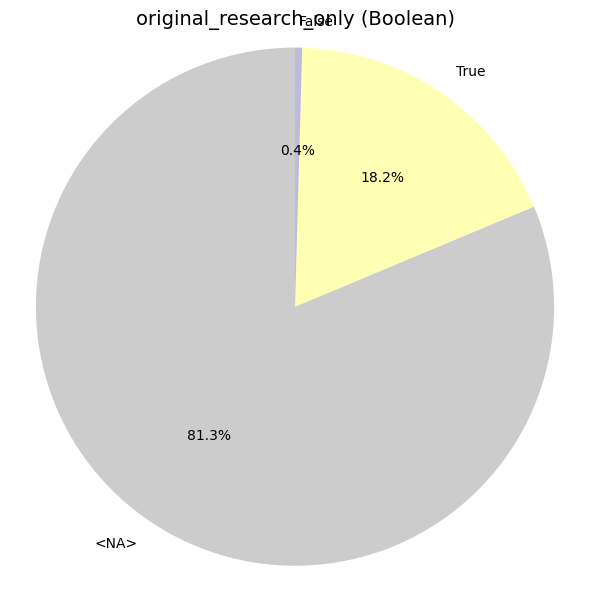

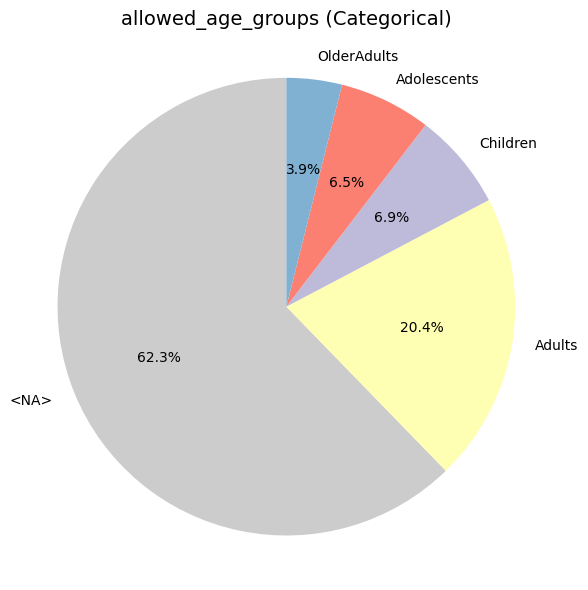

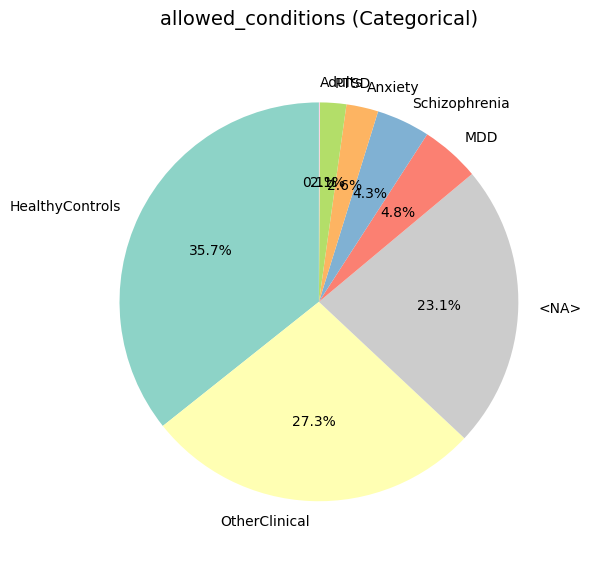

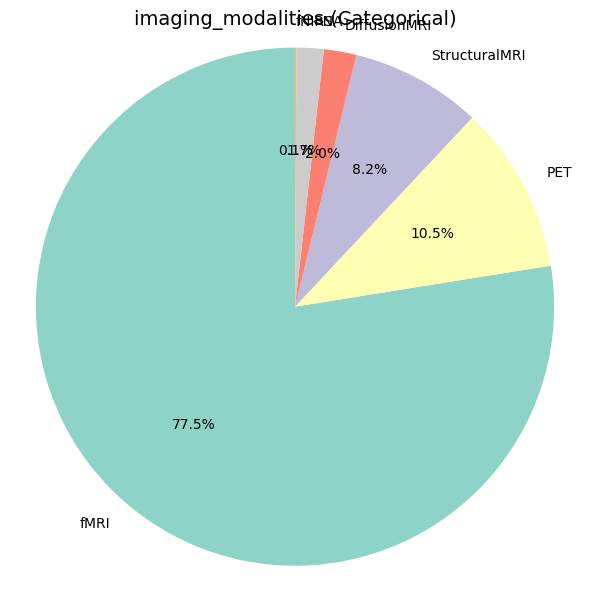

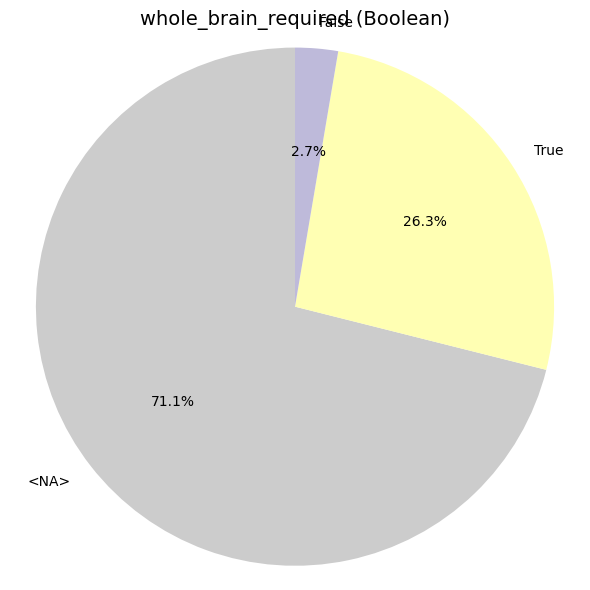

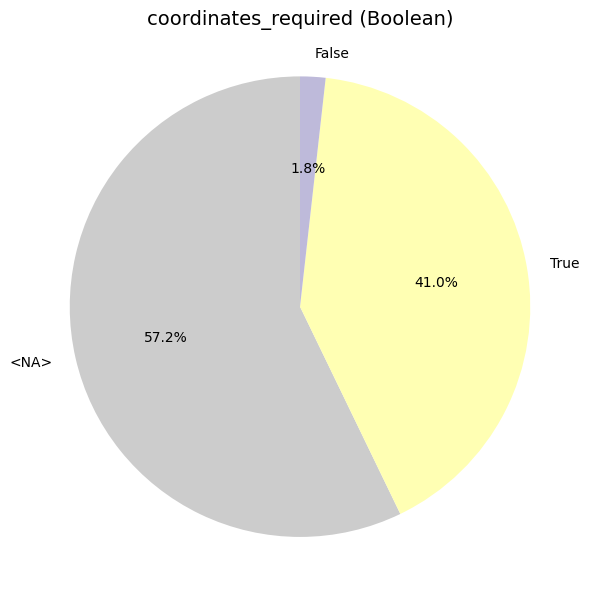

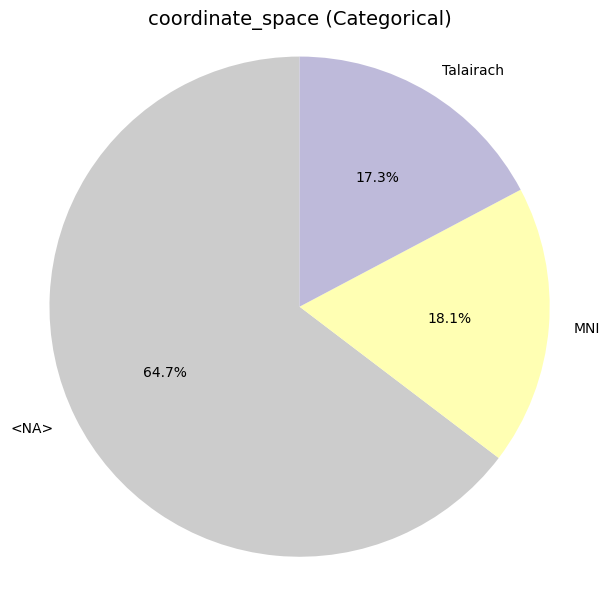

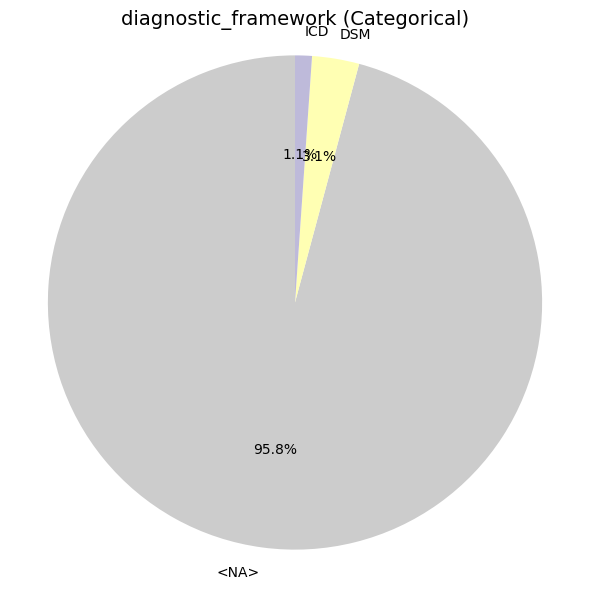

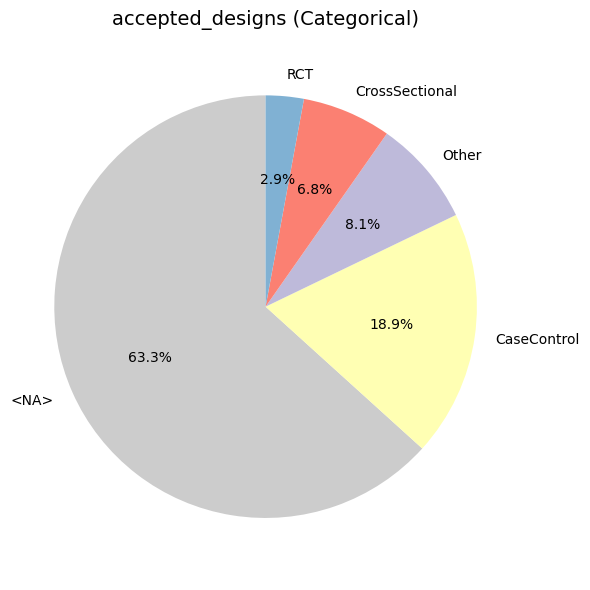

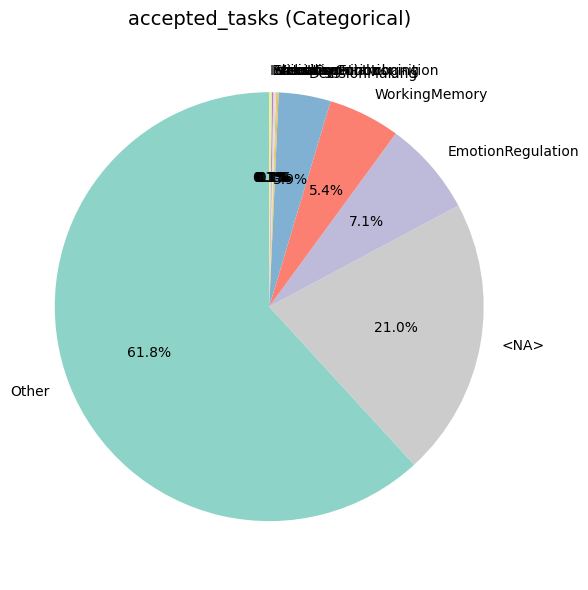

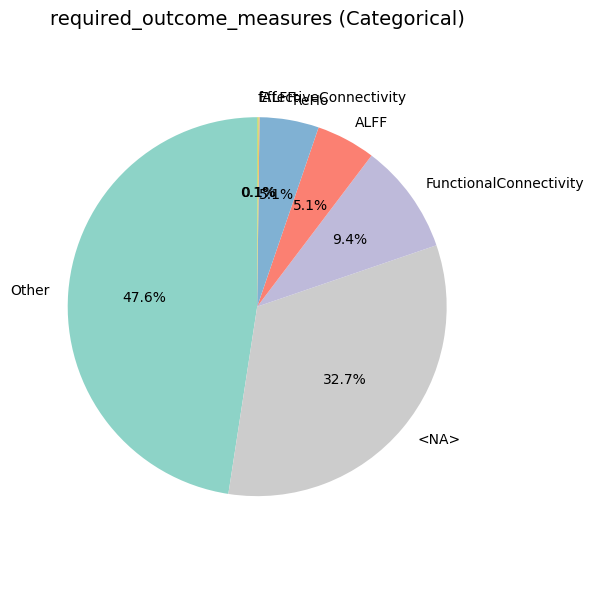

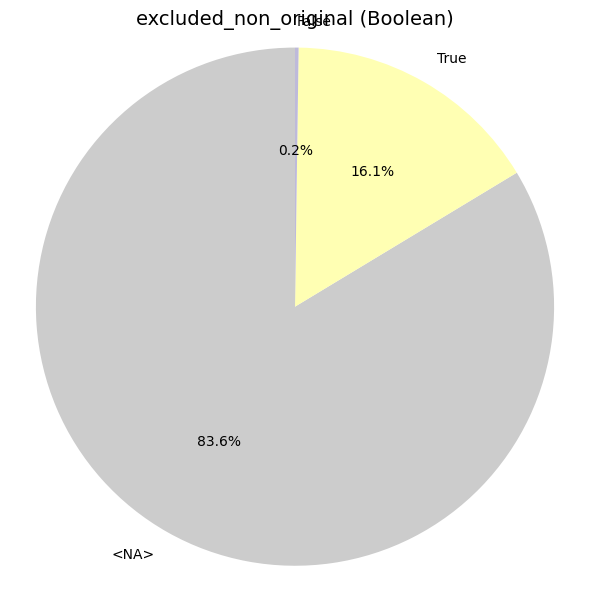

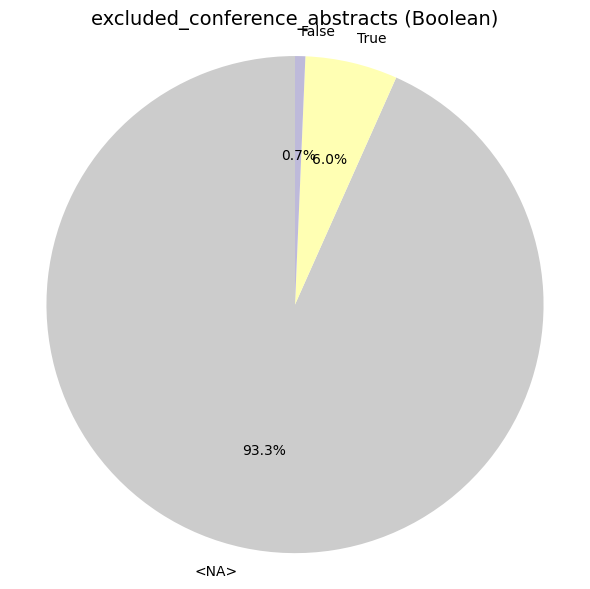

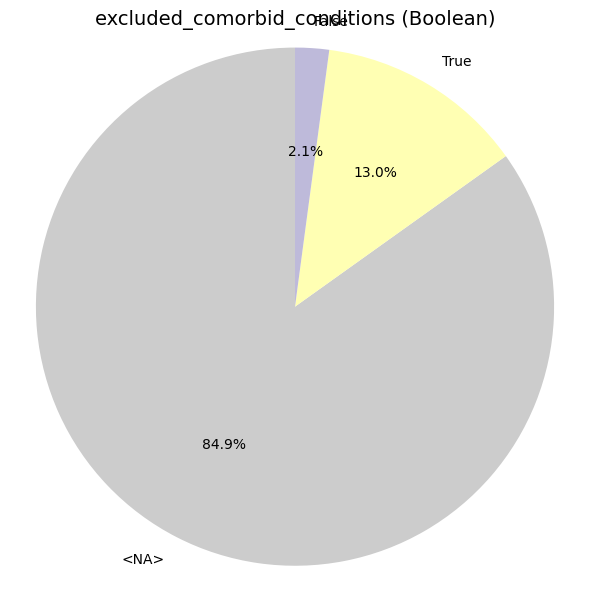

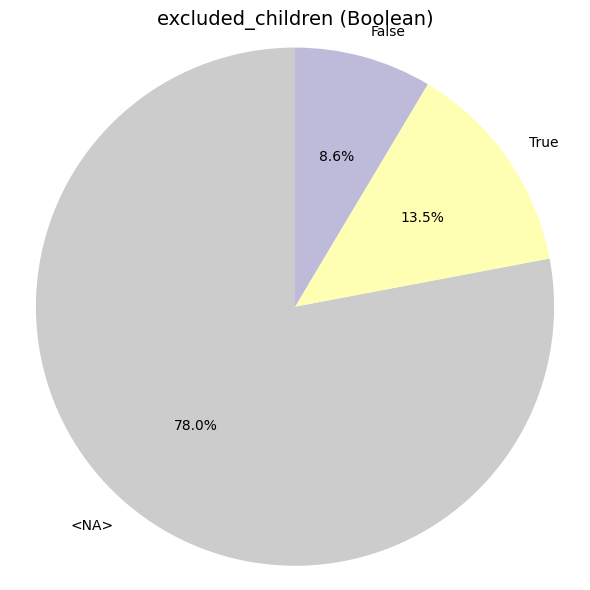

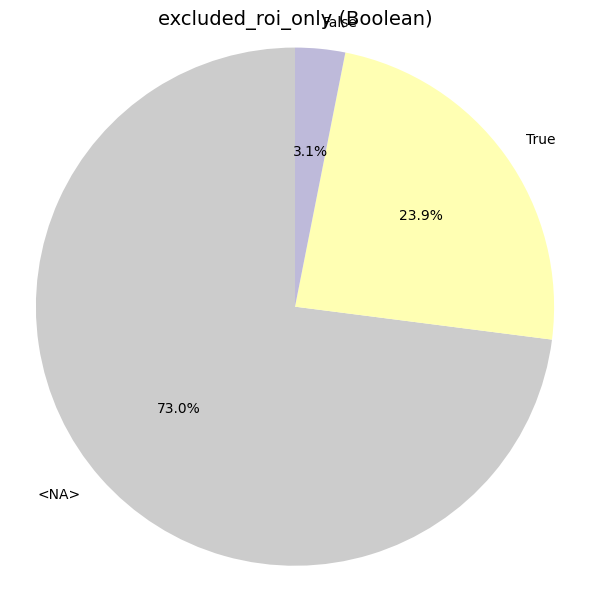

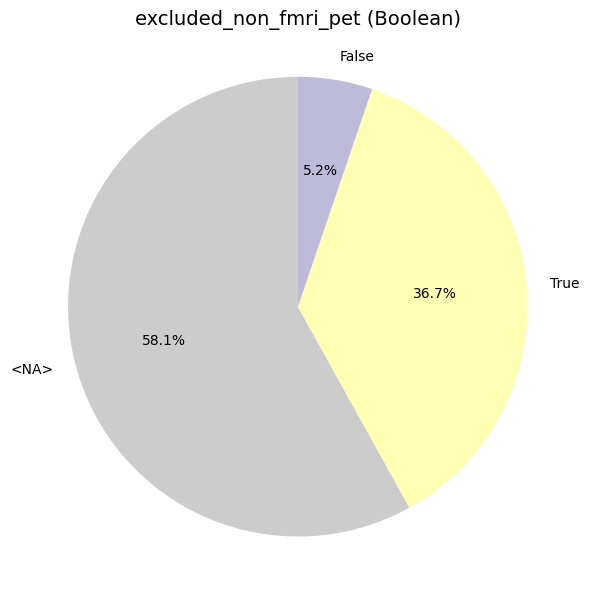

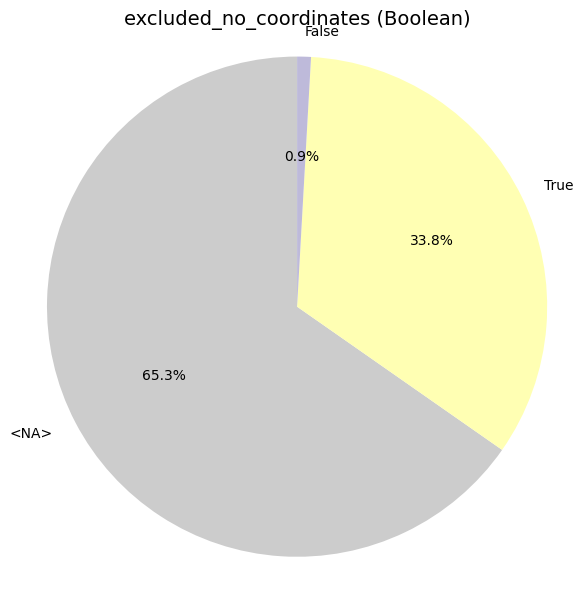

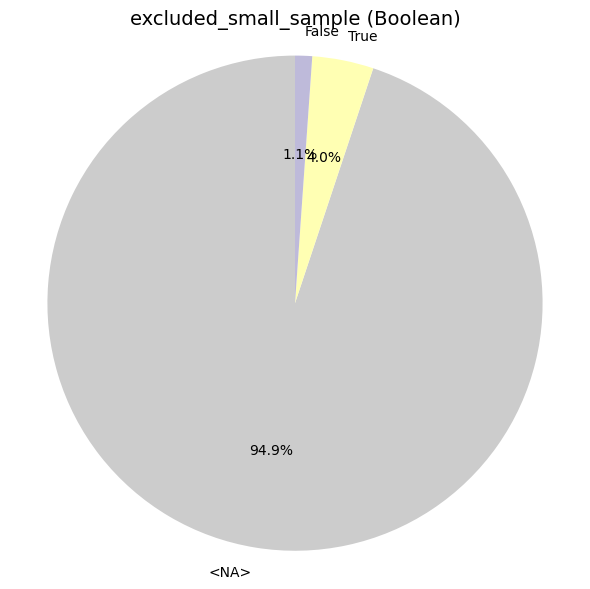

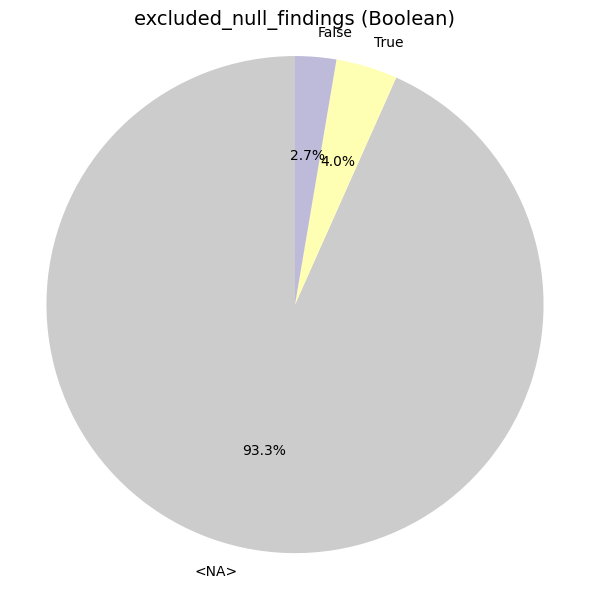

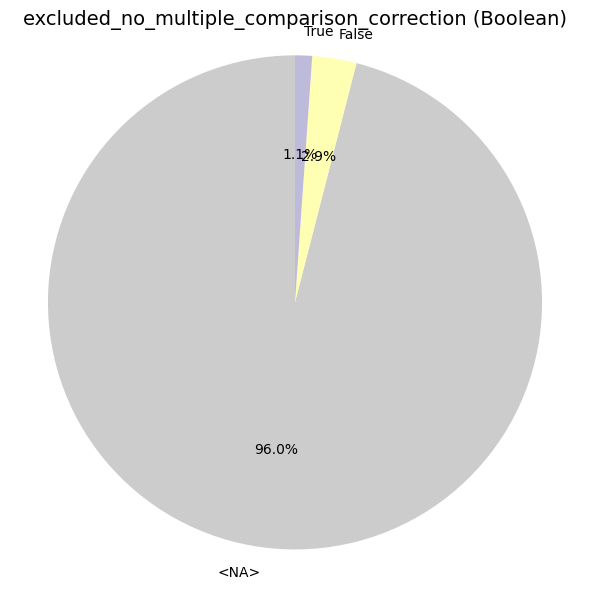

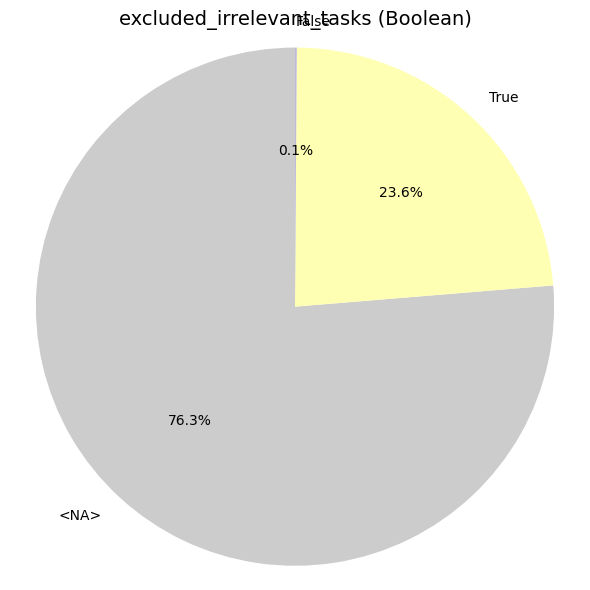

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Example: Load your data
# df = pd.read_csv("your_file.csv")

# Replace None-like values with NaN
df = df.replace({None: pd.NA, 'None': pd.NA})

# Choose a nice color palette
color_palette = plt.cm.Set3.colors

cols_to_plot = [c for c in df.columns if c.lower() != "doi"]

for col in cols_to_plot:
    plt.figure(figsize=(6, 6))

    # Get unique non-null values as hashable (convert lists/arrays to tuples)
    unique_vals = set(
        tuple(v) if isinstance(v, (list, np.ndarray)) else v
        for v in df[col].dropna()
    )

    # Boolean-like check
    if unique_vals.issubset({True, False}):
        counts = df[col].value_counts(dropna=False)  # keep <NA>
        counts.index = counts.index.map(lambda x: "<NA>" if pd.isna(x) else x)

        colors = []
        for label in counts.index:
            if label == "<NA>":
                colors.append("#cccccc")  # Gray for missing
            else:
                colors.append(color_palette[len(colors) % len(color_palette)])

        counts.plot(
            kind="pie",
            autopct='%1.1f%%',
            startangle=90,
            colors=colors,
            textprops={'fontsize': 10}
        )
        plt.ylabel("")
        plt.axis('equal')
        plt.title(f"{col} (Boolean)", fontsize=14)

    else:
        # Flatten all list/array-like entries into a single list of values
        all_vals = []
        for val in df[col]:
            if isinstance(val, (list, np.ndarray)):
                all_vals.extend(list(val))
            elif isinstance(val, str) and val.startswith("[") and val.endswith("]"):
                try:
                    parsed = ast.literal_eval(val)
                    if isinstance(parsed, list):
                        all_vals.extend(parsed)
                    else:
                        all_vals.append(parsed)
                except:
                    all_vals.append(val)
            elif pd.isna(val):
                all_vals.append("<NA>")
            else:
                all_vals.append(val)

        counts = pd.Series(Counter(all_vals)).sort_values(ascending=False)
        colors = []
        for label in counts.index:
            if label == "<NA>":
                colors.append("#cccccc")
            else:
                colors.append(color_palette[len(colors) % len(color_palette)])

        counts.plot(
            kind="pie",
            autopct='%1.1f%%',
            startangle=90,
            colors=colors,
            textprops={'fontsize': 10}
        )
        plt.ylabel("")
        plt.axis('equal')
        plt.title(f"{col} (Categorical)", fontsize=14)

    plt.tight_layout()
    plt.show()
